In [79]:
import numpy as np 
import matplotlib.pyplot as plt
from data_processing import *
from report_processing import *


In [80]:
filename="axicon\\轴锥镜2-外.csv"
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

image_center=(17/2*point_per_mm,17/2*point_per_mm)
            # print(image_center)
ring_num=4

        
binary_image = detect_edge(data,threshold=1.0)

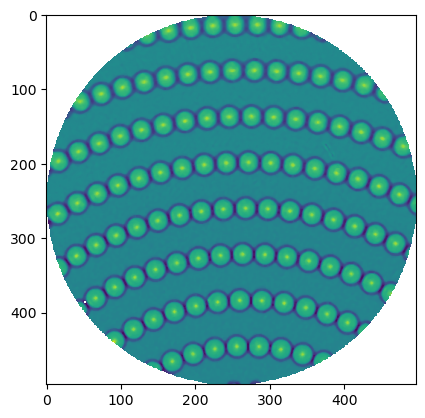

In [81]:
plt.imshow(data)

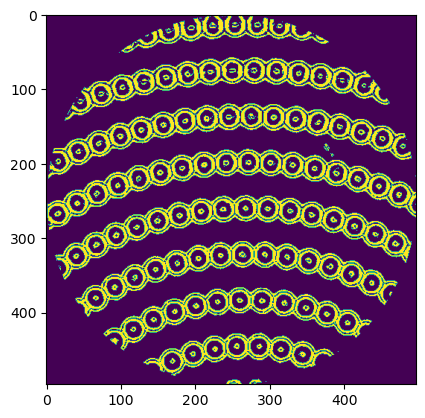

In [82]:
plt.imshow(binary_image)

In [83]:
minRadius=(0.8*point_per_mm/2)
maxRadius=(1.5*point_per_mm/2) 
print(minRadius,maxRadius) 

11.694117647058825 21.926470588235293


In [84]:
point_per_mm

29.235294117647058

In [85]:
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

image_center=(17/2*point_per_mm,17/2*point_per_mm)
            # print(image_center)
ring_num=4

minRadius=(0.8*point_per_mm/2)
maxRadius=(1.5*point_per_mm/2)  
min_area=3.14*minRadius**2/4
max_area=3.14*maxRadius**2/4   
print(minRadius,maxRadius) 
print(min_area,max_area)  

binary_image = detect_edge(data,threshold=1.0)
# Apply the function to the binary_image
microlenses, microlens_only_image = label_microlens_test(
    binary_image,
    minRadius,
    maxRadius
    )
microlens_params=microlens_centers_radius(microlenses)
sorted_microlens_params=cluster_rings(
        microlens_params,
        image_center=image_center,
        ring_num=ring_num,
        max_ring = 2,
        threshold=10)

11.694117647058825 21.926470588235293
107.3506242214533 377.4045382785467


c:\Users\goldengrape\miniconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


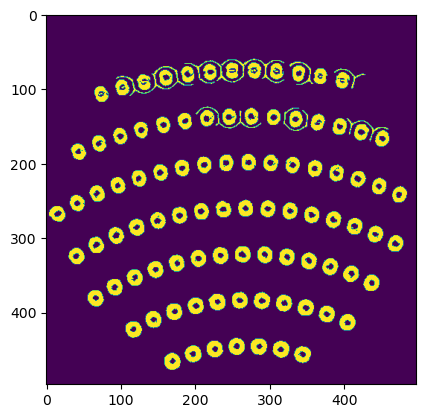

In [86]:
plt.imshow(microlens_only_image)

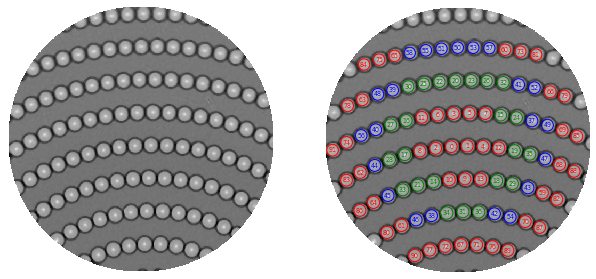

In [87]:
whole_pic_filename=f"{filename.split('.')[0]}_whole.png"
report_whole_picture(sorted_microlens_params, data,whole_pic_filename,dpi=75),
plt.show()

5.642062024390244


C:\Users\goldengrape\AppData\Local\Temp\ipykernel_24716\1433816350.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


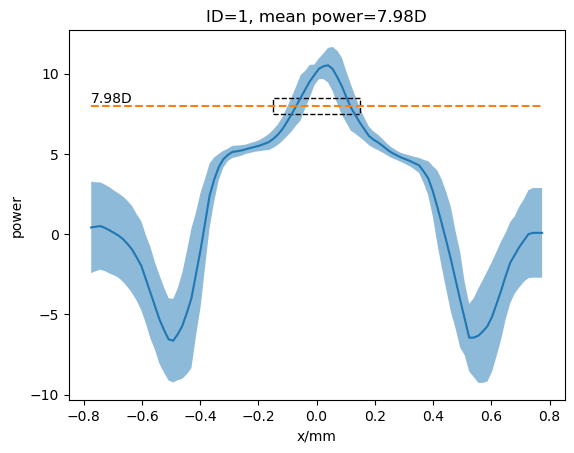

In [88]:
fig=report_one_microlens(1,sorted_microlens_params,data,radius=0.3/2*point_per_mm, mm_per_point=mm_per_point, N_line=6,N_point=100)
power=measure_one_microlens_center_area(1,sorted_microlens_params,data,radius=0.7/2*point_per_mm)
fig.show()
print(power)

In [89]:

mean_list=[]
std_list=[]
diameter_list=[0.7,0.5,0.3,0.1]
for d in diameter_list:
    power_list=[]
    for i in range(len(sorted_microlens_params)):
        measure_radius=d/2*point_per_mm
        power=measure_one_microlens_center_area(i,sorted_microlens_params,data,radius=measure_radius)
        power_list.append(power)
        # fig.show()
    mean_power=np.mean(power_list)
    std_power=np.std(power_list)
    mean_list.append(mean_power)
    std_list.append(std_power)
    print(f"{d}, {mean_power:.3f}, {std_power:.3f}")

0.7, 5.791, 0.372
0.5, 6.647, 0.478
0.3, 8.242, 0.438
0.1, 11.045, 0.357


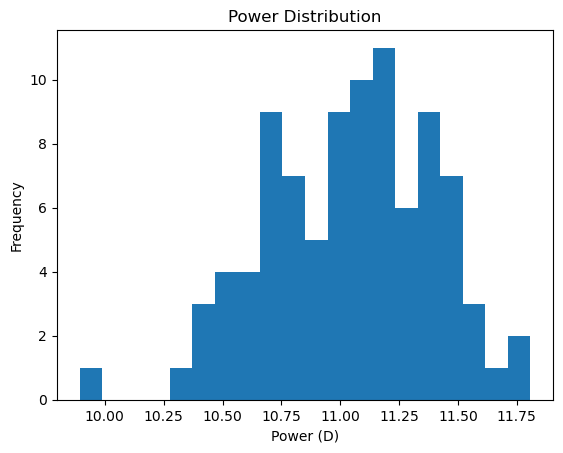

In [90]:
# show power_list histogram
# 同时绘制出连续分布曲线
fig, ax = plt.subplots()
ax.hist(power_list, bins=20)
ax.set_xlabel('Power (D)')
ax.set_ylabel('Frequency')
ax.set_title('Power Distribution')
plt.show()


C:\Users\goldengrape\AppData\Local\Temp\ipykernel_24716\241213352.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(power_list, bins=20, ax=ax, kde=True, color='b')
c:\Users\goldengrape\miniconda3\envs\cv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


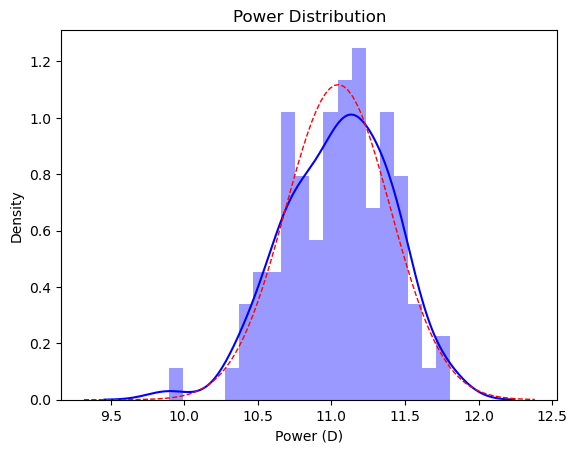

In [91]:
import seaborn as sns
from scipy.stats import norm

# show power_list histogram with KDE
fig, ax = plt.subplots()
sns.distplot(power_list, bins=20, ax=ax, kde=True, color='b')
ax.set_xlabel('Power (D)')
ax.set_ylabel('Density')
ax.set_title('Power Distribution')
# 用虚线画出正态分布曲线，显示出两者的差异
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_power, std_power)
ax.plot(x, p, 'r', linewidth=1, linestyle='--')

plt.show()